# Compute performance metrics for the given Y and Y_score without sklearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class lab
   els from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

  0%|▏                                                                             | 29/10100 [00:00<00:40, 251.63it/s]

-----------------------------------------------------------------------------------------------------------------------------
Confusion Matrix
-----------------------------------------------------------------------------------------------------------------------------
True_Negative is: 0
False_Positive is: 100
True_Positive is: 10000
False_Negative is: 0
-----------------------------------------------------------------------------------------------------------------------------
F1 Score
-----------------------------------------------------------------------------------------------------------------------------
F1 Score is: 0.9950248756218906
-----------------------------------------------------------------------------------------------------------------------------
Accuracy Score
-----------------------------------------------------------------------------------------------------------------------------
Accuracy Score is: 0.9900990099009901
---------------------------------------------

100%|███████████████████████████████████████████████████████████████████████████| 10100/10100 [00:39<00:00, 253.92it/s]


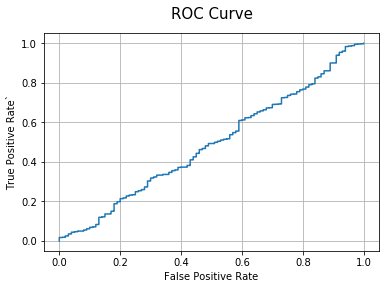

AUC_Score is 0.48829900000000004


In [10]:
df = pd.read_csv("5_a.csv")
df['y_pred'] = np.where(df['proba']>0.5, 1, 0)


#Computing Confusion Matrix

for i in tqdm(df['proba']):
    True_Positive = ((df['y']==1.0) & (df['y_pred'] == 1.0)).sum()  
    False_Negative = ((df['y']==1.0) & (df['y_pred'] == 0.0)).sum()
    True_Negative = ((df['y']==0.0) & (df['y_pred'] == 0.0)).sum()
    False_Positive = ((df['y']==0.0) & (df['y_pred'] == 1.0)).sum()


print("-"*125)     
print("Confusion Matrix")
print("-"*125)
print("True_Negative is:",True_Negative )  
print("False_Positive is:",False_Positive)
print("True_Positive is:",True_Positive )
print("False_Negative is:",False_Negative)

 #Caclulating F1 Score


print("-"*125)
print("F1 Score")
print("-"*125)

precision = True_Positive/(True_Positive+False_Positive)

recall = True_Positive/(True_Positive+False_Negative)


F1_Score = (2*precision*recall)/(precision+recall)
        
print("F1 Score is:" , F1_Score)        
        
        
# #Caclulating Accuracy Score

print("-"*125)
print("Accuracy Score")
print("-"*125)

Accuracy_Score = (True_Positive+True_Negative)/(True_Positive+True_Negative+False_Negative+False_Positive)
print("Accuracy Score is:", Accuracy_Score)
        
#AUC Score
print("-"*125)
print("AUC Score")
print("-"*125)

TPR =[]
FPR =[]
df = df.sort_values(by= ["proba"], ascending = False)
df.head(5)

for threshold in tqdm(df['proba'].unique()):
    df['y_pred'] =np.where(df['proba']>=threshold, 1,0)
    True_Positive = ((df['y']==1.0) & (df['y_pred'] == 1.0)).sum()  
    False_Negative = ((df['y']==1.0) & (df['y_pred'] == 0.0)).sum()
    True_Negative = ((df['y']==0.0) & (df['y_pred'] == 0.0)).sum()
    False_Positive = ((df['y']==0.0) & (df['y_pred'] == 1.0)).sum()
   
    TPR.append(True_Positive/(True_Positive+False_Negative))
    FPR.append(False_Positive/(False_Positive+True_Negative))
    
plt.plot(FPR,TPR)
plt.title("ROC Curve",fontsize = 15,y =1.04)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate`')
plt.grid()
plt.show()

AUC_Score = np.trapz(TPR, FPR)
print("AUC_Score is",AUC_Score)      

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

  0%|                                                                                | 7/10100 [00:00<02:30, 67.12it/s]

-----------------------------------------------------------------------------------------------------------------------------
Confusion Matrix
-----------------------------------------------------------------------------------------------------------------------------
True_Negative is: 9761
False_Positive is: 239
True_Positive is: 55
False_Negative is: 45
-----------------------------------------------------------------------------------------------------------------------------
F1 Score
-----------------------------------------------------------------------------------------------------------------------------
F1 Score is: 0.2791878172588833
-----------------------------------------------------------------------------------------------------------------------------
Accuracy Score
-----------------------------------------------------------------------------------------------------------------------------
Accuracy Score is: 0.9718811881188119
--------------------------------------------

100%|████████████████████████████████████████████████████████████████████████████| 10100/10100 [01:53<00:00, 88.66it/s]


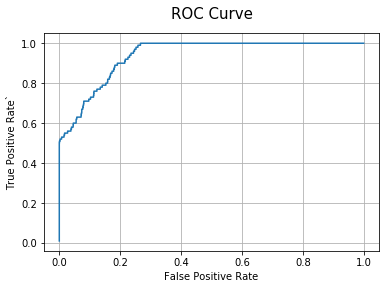

AUC_Score is 0.9377570000000001


In [59]:
df = pd.read_csv("5_b.csv")
df['y_pred'] = np.where(df['proba']>0.5, 1, 0)


#Computing Confusion Matrix

for i in tqdm(df['proba']):
    True_Positive = ((df['y']==1.0) & (df['y_pred'] == 1.0)).sum()  
    False_Negative = ((df['y']==1.0) & (df['y_pred'] == 0.0)).sum()
    True_Negative = ((df['y']==0.0) & (df['y_pred'] == 0.0)).sum()
    False_Positive = ((df['y']==0.0) & (df['y_pred'] == 1.0)).sum()


print("-"*125)     
print("Confusion Matrix")
print("-"*125)
print("True_Negative is:",True_Negative )  
print("False_Positive is:",False_Positive)
print("True_Positive is:",True_Positive )
print("False_Negative is:",False_Negative)

 #Caclulating F1 Score


print("-"*125)
print("F1 Score")
print("-"*125)

precision = True_Positive/(True_Positive+False_Positive)

recall = True_Positive/(True_Positive+False_Negative)


F1_Score = (2*precision*recall)/(precision+recall)
        
print("F1 Score is:" , F1_Score)        
        
        
# #Caclulating Accuracy Score

print("-"*125)
print("Accuracy Score")
print("-"*125)

Accuracy_Score = (True_Positive+True_Negative)/(True_Positive+True_Negative+False_Negative+False_Positive)
print("Accuracy Score is:", Accuracy_Score)
        
#AUC Score
print("-"*125)
print("AUC Score")
print("-"*125)

TPR =[]
FPR =[]
df = df.sort_values(by= ["proba"], ascending = False)
df.head(5)

for threshold in tqdm(df['proba'].unique()):
    df['y_pred'] =np.where(df['proba']>=threshold, 1,0)
    True_Positive = ((df['y']==1.0) & (df['y_pred'] == 1.0)).sum()  
    False_Negative = ((df['y']==1.0) & (df['y_pred'] == 0.0)).sum()
    True_Negative = ((df['y']==0.0) & (df['y_pred'] == 0.0)).sum()
    False_Positive = ((df['y']==0.0) & (df['y_pred'] == 1.0)).sum()
   
    TPR.append(True_Positive/(True_Positive+False_Negative))
    FPR.append(False_Positive/(False_Positive+True_Negative))
    
plt.plot(FPR,TPR)
plt.title("ROC Curve",fontsize = 15,y =1.04)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate`')
plt.grid()
plt.show()

AUC_Score = np.trapz(TPR, FPR)
print("AUC_Score is",AUC_Score)

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [12]:
df = pd.read_csv("5_c.csv")
dict ={}
A = 0 
df = df.sort_values(by= ['prob'], ascending = False)
for threshold in tqdm(df['prob'].unique()):
    df['y_pred'] =np.where(df['prob']>=threshold, 1,0)
    False_Negative = ((df['y']==1.0) & (df['y_pred'] == 0.0)).sum()
    False_Positive = ((df['y']==0.0) & (df['y_pred'] == 1.0)).sum()
    
    A = 500*False_Negative + 100*False_Positive
    dict[threshold] = A

temp = min(dict.values()) 
res = [key for key in dict if dict[key] == temp] 
print("Threshold Value which gives minimum A metric value is ",res)
  

100%|█████████████████████████████████████████████████████████████████████████████| 2791/2791 [00:05<00:00, 505.79it/s]

Threshold Value which gives minimum A metric value is  [0.2300390278970873]


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [25]:
df = pd.read_csv("5_d.csv")

#Mean Square Error
print("-"*125)
print("Mean Square Error")
print("-"*125)
actual_mean = df['y'].mean()
diff = 0
diff_sq = 0
y_actual = 0
x = 0 

for y, y_pred in zip(df.iloc[:, 0], df.iloc[:, 1]):
    diff_sq += (y-y_pred)**2
    diff += abs(y-y_pred)
    y_actual += y
    x+=(y-actual_mean)**2
    
               
MSE = diff_sq/len(df)
print("Mean Square Error is ",MSE)
#Mean Absolute Percentage Error
print("-"*125)
print("Mean Absolute Percentage Error")
print("-"*125)

MAPE = ((diff*100)/y_actual)      #Modified MAPE instead of actual value we use mean of actual value in denominator
print("Mean Absolute Percentage Error is",MAPE)

#Coefficient Of Determination

print("-"*125)
print("Coefficient Of Determination")
print("-"*125)

Coeff = 1-((diff_sq)/(x))

print("Coefficient Of Determination is ",Coeff)

-----------------------------------------------------------------------------------------------------------------------------
Mean Square Error
-----------------------------------------------------------------------------------------------------------------------------
Mean Square Error is  177.16569974554707
-----------------------------------------------------------------------------------------------------------------------------
Mean Absolute Percentage Error
-----------------------------------------------------------------------------------------------------------------------------
Mean Absolute Percentage Error is 12.91202994009687
-----------------------------------------------------------------------------------------------------------------------------
Coefficient Of Determination
-----------------------------------------------------------------------------------------------------------------------------
Coefficient Of Determination is  0.9563582786990964
